In [123]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
dataset=pd.read_csv(r'C:\Users\Sama7h\Desktop\car_price_prediction.csv')

In [127]:
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [129]:
dataset.shape

(19237, 18)

In [131]:
dataset.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [133]:
dataset.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [137]:
dataset.duplicated().sum()

313

In [139]:
dataset.drop_duplicates(inplace=True)

In [141]:
dataset.shape

(18924, 18)

In [143]:
numerical_features=[]
categorical_columns=[]
for column in dataset.columns:
    if pd.api.types.is_numeric_dtype(dataset[column]):
        numerical_features.append(column)
    else:
        categorical_columns.append(column)

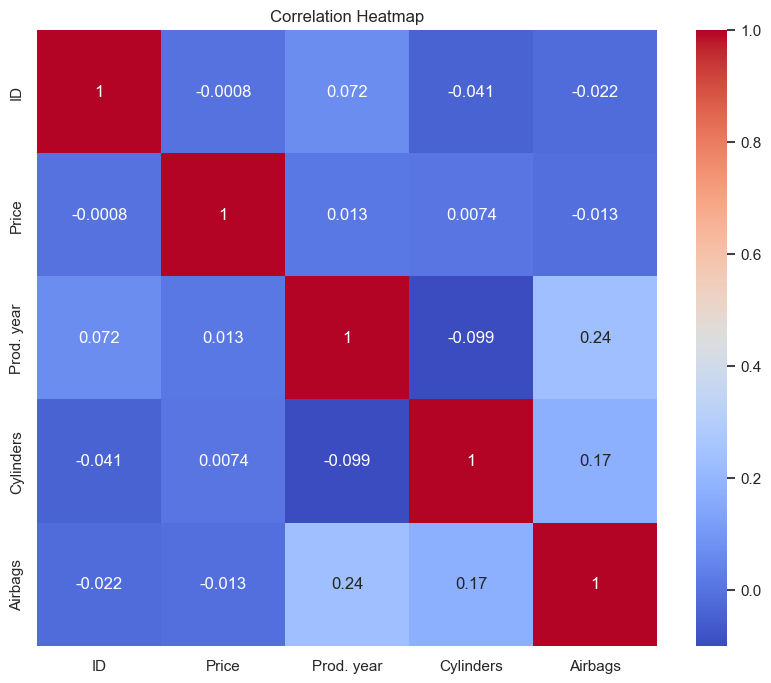

In [145]:
correlation_matrix = dataset[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [147]:
average_prices = dataset.groupby('Prod. year')['Price'].mean().reset_index()
average_prices[:10]

,Prod. year,Price
0,1939,171.333333
1,1943,119172.000000
2,1947,150.000000
3,1953,17735.250000
4,1957,7527.000000
5,1964,6585.500000
6,1965,65074.000000
7,1968,2200.000000
8,1973,15681.000000
9,1974,2437.000000


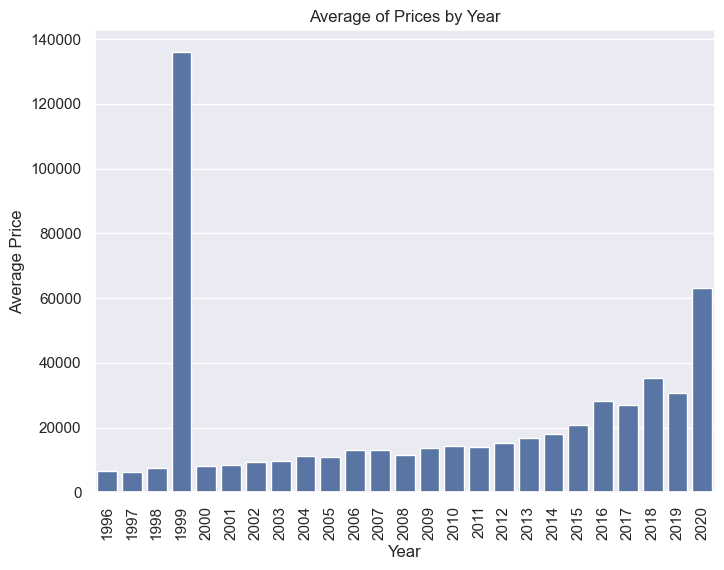

In [149]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Prod. year', y='Price', data=average_prices.tail(25))
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\Sama7h\AppData\Local\Temp\ipykernel_14048\1173626581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= dataset, x='Color',palette='hot')


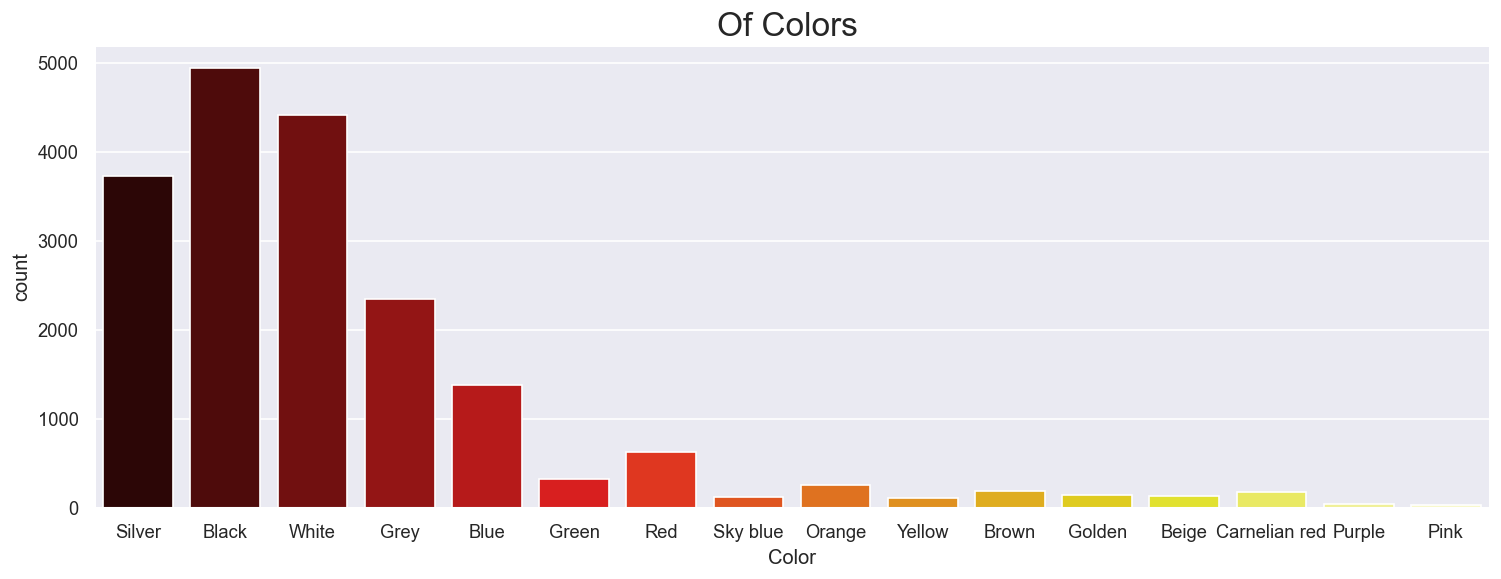

In [151]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= dataset, x='Color',palette='hot')
plt.title("Of Colors ",fontsize=20)
plt.show()

In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

In [157]:
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,44731507,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,45774419,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,45769185,3607,512,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,45809263,11726,366,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4


In [159]:
dataset=dataset.drop(['ID'],axis=1)
x=dataset.drop(['Price'],axis=1)
y=dataset.Price

In [161]:
x.shape

(18924, 16)

In [163]:
y.shape

(18924,)

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [222]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [224]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred1 = lm.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 11308.798875838293
Mean Squared Error: 5961460197.23652
Root Mean Squared Error: 77210.49279234344
R2 Score: -17.273543394384216


In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred1, color='red', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

In [193]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [194]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 10510.650543011801
Mean Squared Error: 48878679289.50857
Root Mean Squared Error: 221085.23082627787
R2 Score: -148.82682723790847


In [202]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
DTR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [204]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = DTR.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 11308.798875838293
Mean Squared Error: 5961460197.23652
Root Mean Squared Error: 77210.49279234344
R2 Score: -17.273543394384216


In [216]:
from sklearn.svm import SVR
model_SVR=SVR()
model_SVR.fit(x_train,y_train)

SVR()

In [218]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = DTR.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 11308.798875838293
Mean Squared Error: 5961460197.23652
Root Mean Squared Error: 77210.49279234344
R2 Score: -17.273543394384216


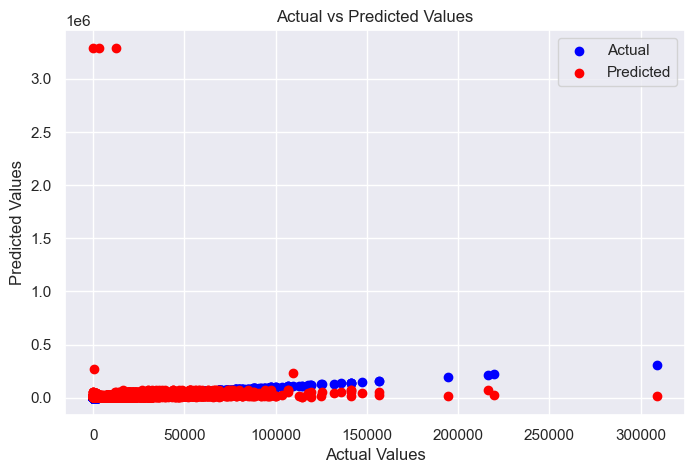

In [220]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()